In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm
import pandas as pd
from minisom import MiniSom
from sklearn import cluster

# First Encounter

In [2]:
QflagA_file = np.load('PSP_Data/QflagA_MB.npy')
QflagB_file = np.load('PSP_Data/QflagB_MB.npy')
efluxA_file = np.load('PSP_Data/eflux_spanA.npy')
efluxB_file = np.load('PSP_Data/eflux_spanB.npy')

In [3]:
Counter(QflagA_file[:,0])

Counter({0: 2945, 1: 139})

In [4]:
print(np.shape(efluxA_file))
# for i in range(len(QflagA_file)):
#     print(i,QflagA_file[i])

(3084, 32, 8, 16)


In [6]:
MB_Energy = np.load('PSP_Data/MB_PA_E_T_EnergyLevels20181105.npy')
MB_PA = np.load('PSP_Data/MB_PA_E_T_Pitch angles20181105.npy')
MB_SpanA = np.load('PSP_Data/MB_PA_E_T_SpanA20181105.npy')
MB_SpanB = np.load('PSP_Data/MB_PA_E_T_SpanB20181105.npy')
MB_Epoch = np.load('PSP_Data/MB_Epoch_Time.npy')
MB_time = np.load('PSP_Data/MB_String_time.npy')

In [7]:
print(np.shape(MB_SpanA))
print(np.shape(MB_Energy))
print(np.shape(MB_PA))
print(np.shape(MB_Epoch))
print(np.shape(MB_time))
print(MB_Energy[0])
print(MB_time[0])

(32, 12, 3084)
(1, 32)
(3084, 12)
(3084, 1)
(3084,)
[1793.9454    1443.3107    1160.9679     934.1767     751.2148
  604.43744    486.20013    391.40628    314.45016    253.29294
  203.85744    163.5956     131.99768    106.00587     85.11048
   68.80188     55.041508    44.338993    35.67505     28.540041
   22.933962    18.347168    14.779664    12.231446     9.683228
    7.644654     6.115723     5.0964355    4.0771484    3.0578616
    2.5482178    2.0385742]
05-Nov-2018 00:00:00


In [8]:
theta = np.linspace(1,8,8)
az = np.linspace(1,16,16)

1793.9454


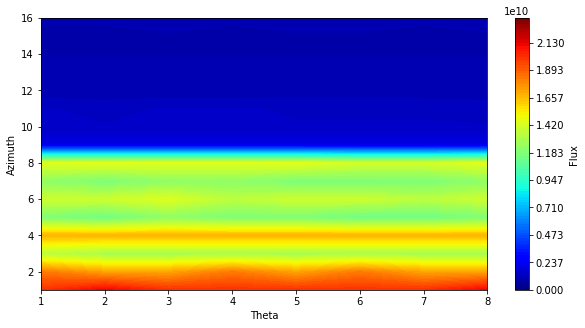

1443.3107


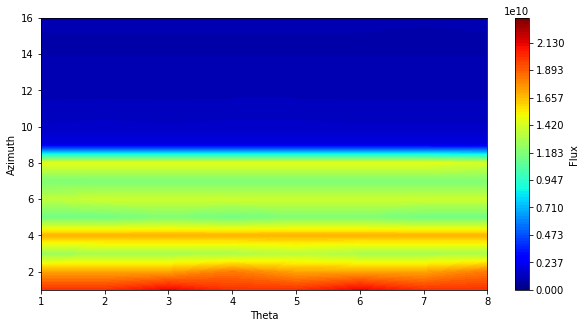

1160.9679


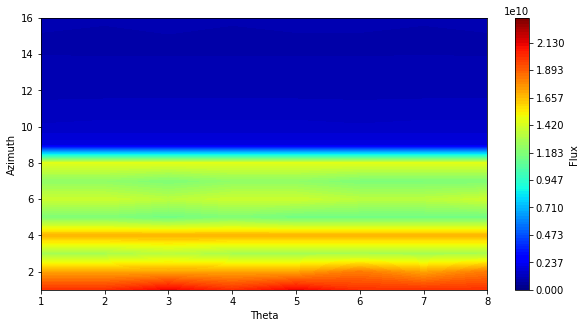

934.1767


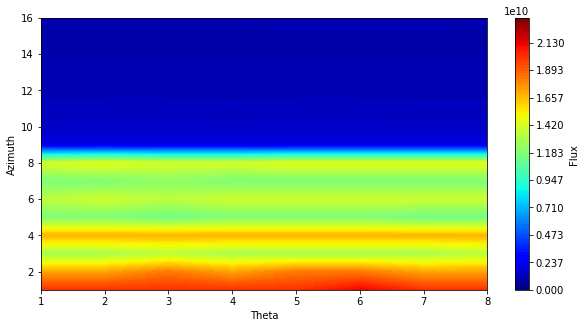

751.2148


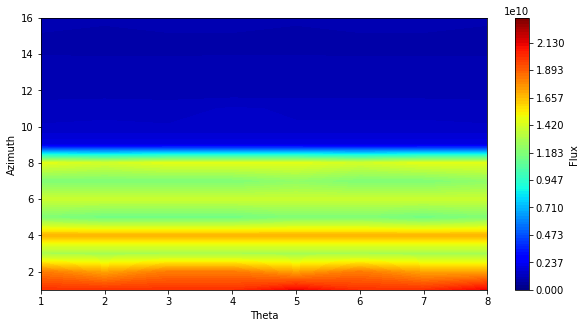

604.43744


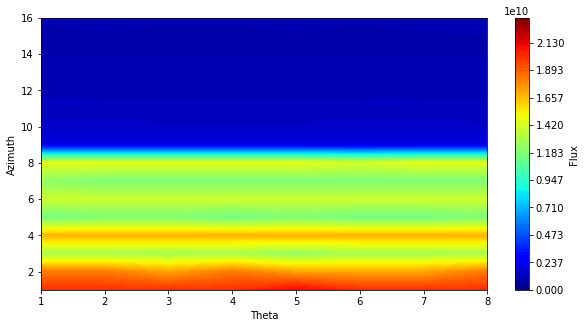

486.20013


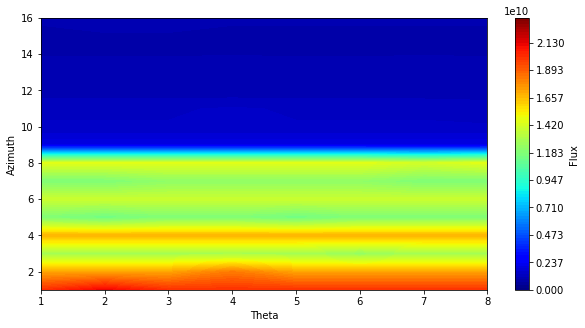

391.40628


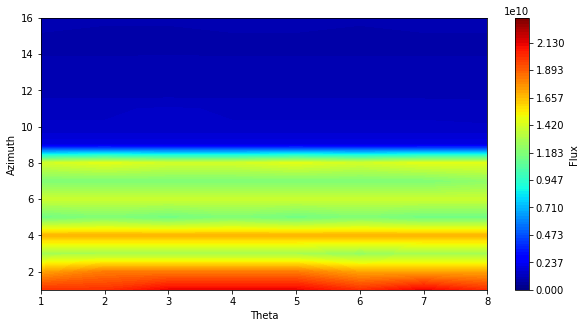

314.45016


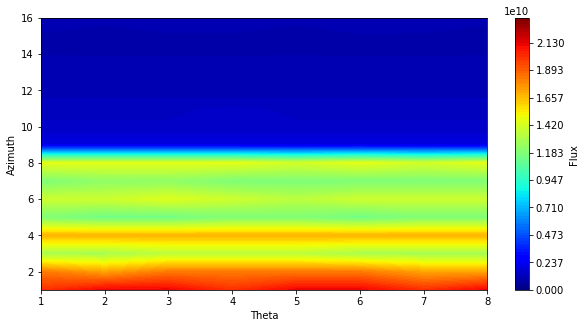

253.29294


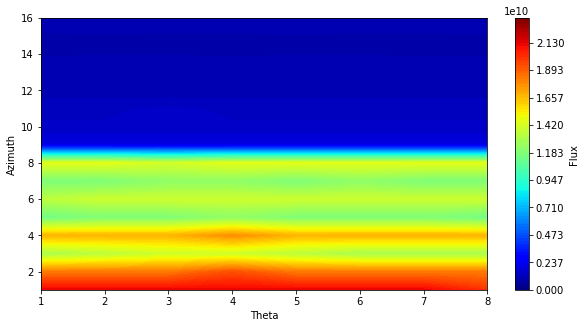

In [9]:
# Azimuth and Elevation plotting
t = 1516
for j in range(10):
    print(MB_Energy[0,j])
    X, Y = np.meshgrid(az,theta)
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    #ax = plt.axes()
    D = efluxA_file[t,j,0:8,0:16]
    vmin, vmax = 0, np.max(efluxA_file[t])
    levels = np.linspace(vmin,vmax,100)
    surf = ax.contourf(Y, X, D, levels=levels, vmax=vmax, vmin=vmin, cmap=cm.jet)
    cbar = fig.colorbar(surf)
    cbar.set_label('Flux')
    ax.set_ylabel('Azimuth')
    ax.set_xlabel('Theta')
    plt.show()

In [10]:
cdf = pycdf.CDF('PSP_Data/psp_swp_spa_sf0_L3_pad_20181105_v01.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 Epoch CDF_TIME_TT2000 [3084]
1 TIME CDF_DOUBLE [3084]
2 MET CDF_DOUBLE [3084]
3 F0 CDF_UINT2 [3084]
4 PEAK_BIN CDF_UINT1 [3084]
5 TOT_ACCUM_PERIOD CDF_UINT4 [3084]
6 NUM_ACCUM CDF_UINT4 [3084]
7 SMP_BITS CDF_INT2 [3084]
8 ARCH_BITS CDF_UINT1 [3084]
9 LTCSNNNN_BITS CDF_UINT1 [3084]
10 STATUS_BITS CDF_UINT1 [3084]
11 PRODUCT_BITS CDF_UINT1 [3084]
12 MODE2 CDF_UINT2 [3084]
13 QUALITY_FLAG CDF_UINT1 [3084]
14 EFLUX_VS_PA_E CDF_FLOAT [3084, 32, 12]
15 PITCHANGLE CDF_FLOAT [3084, 12]
16 ENERGY_VALS CDF_FLOAT [3084, 32]
17 EFLUX_VS_ENERGY CDF_FLOAT [3084, 32]
18 EFLUX_VS_PH_E CDF_FLOAT [3084, 32, 16]
19 PHI_ANG CDF_FLOAT [3084, 32, 16]
20 EFLUX_VS_TH_E CDF_FLOAT [3084, 32, 8]
21 THETA_ANG CDF_FLOAT [3084, 32, 8]
22 MAGF_SC CDF_FLOAT [3084, 3]
23 MAGF_INST CDF_FLOAT [3084, 3]
24 VALID CDF_INT2 [3084]
25 GAP CDF_INT2 [3084]
26 INDEX CDF_INT4 [3084]


In [11]:
epoch = cdf[0][...]
data = cdf[14][...]
pa = cdf[15][...]
energy = cdf[16][...]
mag_sc = cdf[22][...]
mag_inst = cdf[23][...]
print(energy[2061])

[1793.9454    1443.3107    1160.9679     934.1767     751.2148
  604.43744    486.20013    391.40628    314.45016    253.29294
  203.85744    163.5956     131.99768    106.00587     85.11048
   68.80188     55.041508    44.338993    35.67505     28.540041
   22.933962    18.347168    14.779664    12.231446     9.683228
    7.644654     6.115723     5.0964355    4.0771484    3.0578616
    2.5482178    2.0385742]


1510


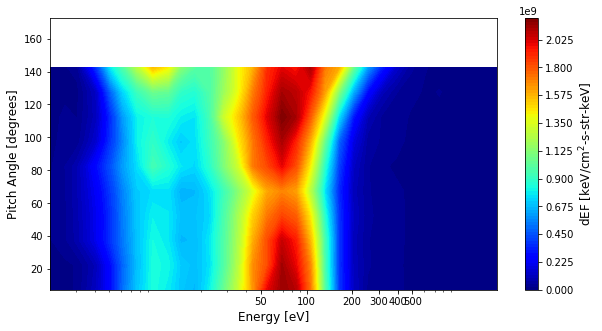

1511


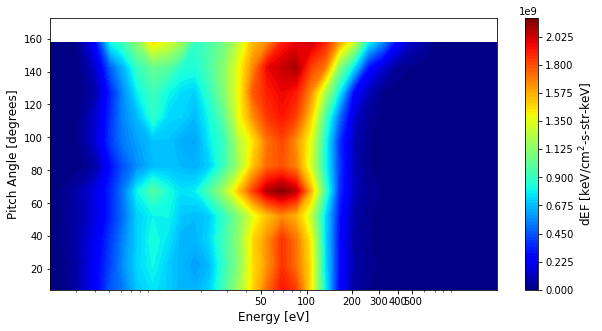

1512


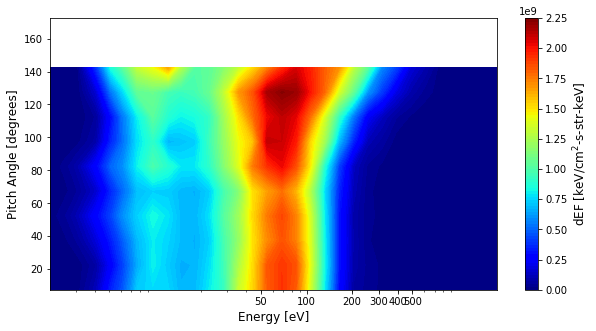

1513


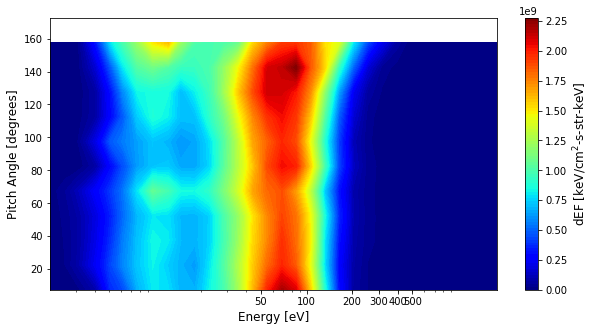

1514


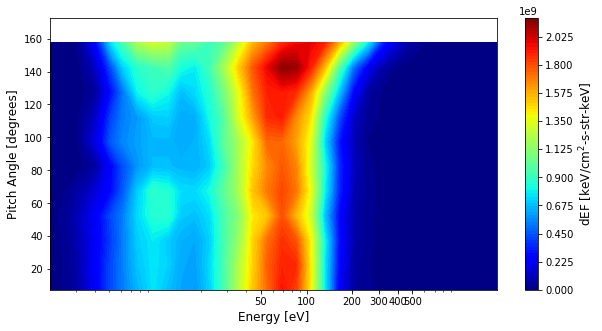

In [12]:
# CDF Pitch Angle Plotting
time = 1510
for t in range(time,time+5):
    print(t)
    Y, X = np.meshgrid(pa[0],energy[0])
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    D = data[t,0:len(energy[0]),0:len(pa[0])]
    #surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
    surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
    cbar = fig.colorbar(surf)
    cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12)
    ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
    ax.set_xlabel('Energy [eV]',fontsize=12)
    ax.set_xscale('log')
    ax.set_xticks([50, 100, 200, 300, 400, 500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.set_xlim(0,5)
    plt.show()

1334


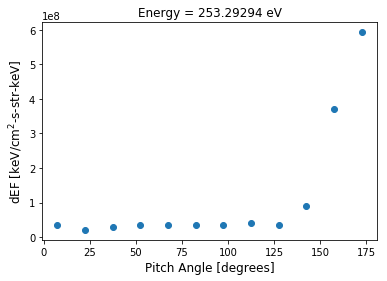

1335


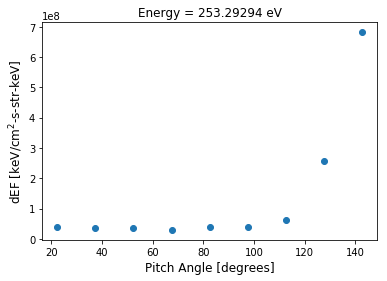

1336


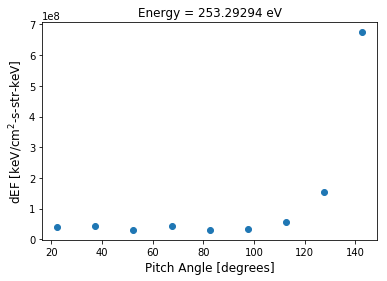

1337


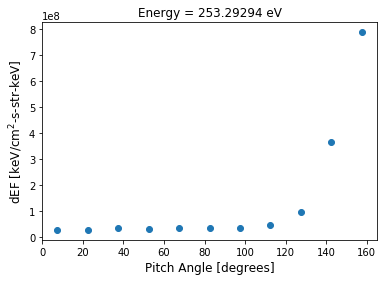

1338


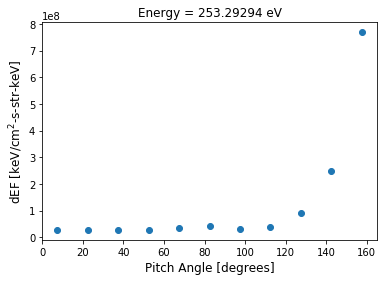

In [13]:
# Pitch angle distributions

e_n = 9 #energy
time = 1334
for time in range(time,time+5):
    y = data[time,e_n,0:12]
    print(time)
    plt.scatter(pa[0,0:12],y)
    plt.title("Energy = " + str(energy[time,e_n]) + " eV")
    plt.xlabel("Pitch Angle [degrees]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.show()

1510


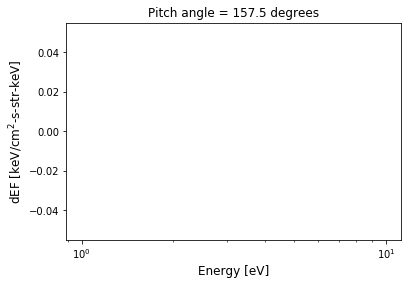

1511


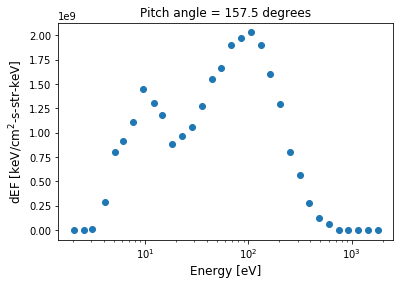

1512


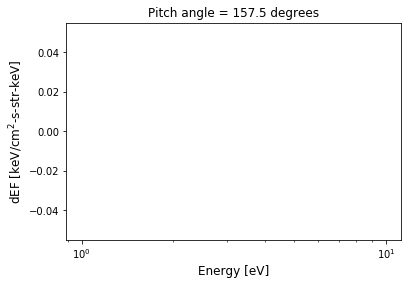

1513


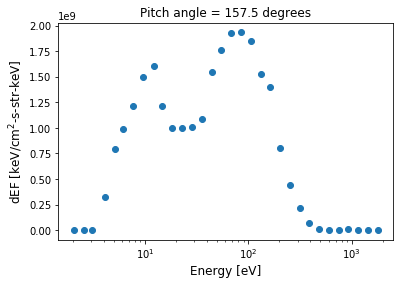

1514


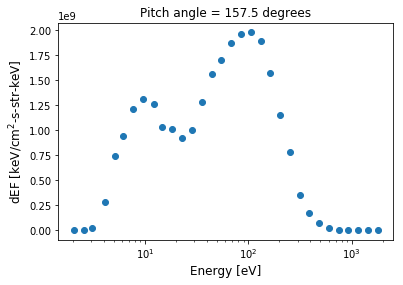

In [14]:
# Energy distributions

time = 1510
for time in range(time,time+5):
    y = data[time,0:32,10]
    print(time)
    plt.scatter((energy[time,0:32]),y)
    plt.title("Pitch angle = " + str(pa[time,10]) + " degrees")
    plt.xlabel("Energy [eV]",fontsize=12)
    plt.xscale('Log')
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.show()

In [15]:
e_n = 9
fluxes = []
fluxes_index = []

for i in range(len(epoch)):
    flux = data[i,e_n,0:12]
    flux[flux == -1.] = 1.
    flux[flux == 0] = 1.
        
    if QflagA_file[i,0] == 1: ## 1 = bad data
        continue
        
    fluxes_index.append(i) #to track actual time index after removing certain times
    fluxes.append(flux)
        
#fluxes = StandardScaler().fit_transform(fluxes)
fluxes = np.array(fluxes)
fluxes = np.log10(fluxes)
print(np.shape(fluxes))
print(np.shape(fluxes_index))

(2945, 12)
(2945,)


In [16]:
fluxes[np.isnan(fluxes)] = np.median(fluxes[~np.isnan(fluxes)]) #impute values in place of nan

In [17]:
k_means = cluster.KMeans(n_clusters=2)
clusters = k_means.fit(fluxes)

In [18]:
Counter(clusters.labels_)

Counter({0: 2266, 1: 679})

In [19]:
#convert to actual time stamps
label_loc = np.where(clusters.labels_ == 1)[0] 
# for i in range(len(label_loc)):
#     print(fluxes_index[label_loc[i]])

In [20]:
# for i in range(1400,1600):
#     print(i,mag_sc[i,0],mag_sc[i,1],mag_sc[i,2])

# Second/Third Encounter

In [21]:
mb_2_01 = np.load('PSP_Data/MB20190401.npz')
print(mb_2_01.files)

['Date', 'QualityFlags', 'PitchAngle', 'Flux', 'Energy_level']


In [22]:
epoch_2_01 = mb_2_01['Date']
QF_2_01 = mb_2_01['QualityFlags']
pa_2_01 = mb_2_01['PitchAngle']
flux_2_01 = mb_2_01['Flux']
energy_2_01 = mb_2_01['Energy_level']

In [23]:
cdf_2_01 = pycdf.CDF('PSP_Data/psp_swp_spe_sf0_L3_pad_20190826_v01.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf_2_01, start=0):
    print(i, item, cdf_2_01[i])

0 Epoch CDF_TIME_TT2000 [6179]
1 TIME CDF_DOUBLE [6179]
2 MET CDF_DOUBLE [6179]
3 F0 CDF_UINT2 [6179]
4 TOT_ACCUM_PERIOD CDF_UINT4 [6179]
5 NUM_ACCUM CDF_UINT4 [6179]
6 SMP_BITS CDF_INT2 [6179]
7 ARCH_BITS CDF_UINT1 [6179]
8 LTCSNNNN_BITS CDF_UINT1 [6179]
9 STATUS_BITS CDF_UINT1 [6179]
10 PRODUCT_BITS CDF_UINT1 [6179]
11 MODE2 CDF_UINT2 [6179]
12 QUALITY_FLAG CDF_UINT1 [6179]
13 EFLUX_VS_PA_E CDF_FLOAT [6179, 32, 12]
14 PITCHANGLE CDF_FLOAT [6179, 12]
15 ENERGY_VALS CDF_FLOAT [6179, 32]
16 EFLUX_VS_ENERGY CDF_FLOAT [6179, 32]
17 SPX_VS_PA_E CDF_INT2 [6179, 32, 12]
18 NSAMPLE_VS_PA_E CDF_INT2 [6179, 32, 12]
19 MAGF_SC CDF_FLOAT [6179, 3]
20 VALID CDF_INT2 [6179]
21 GAP CDF_INT2 [6179]


In [24]:
epoch_2_01 = cdf_2_01[0][...]
QF_2_01 = cdf_2_01[12][...]
data_2_01 = cdf_2_01[13][...]
pa_2_01 = cdf_2_01[14][...]
energy_2_01 = cdf_2_01[15][...]
print(Counter(QF_2_01))
print(energy_2_01[2061])

Counter({0: 6179})
[1793.9454    1443.3107    1160.9679     934.1767     751.2148
  604.43744    486.20013    391.40628    314.45016    253.29294
  203.85744    163.5956     131.99768    106.00587     85.11048
   68.80188     55.041508    44.338993    35.67505     28.540041
   22.933962    18.347168    14.779664    12.231446     9.683228
    7.644654     6.115723     5.0964355    4.0771484    3.0578616
    2.5482178    2.0385742]


11


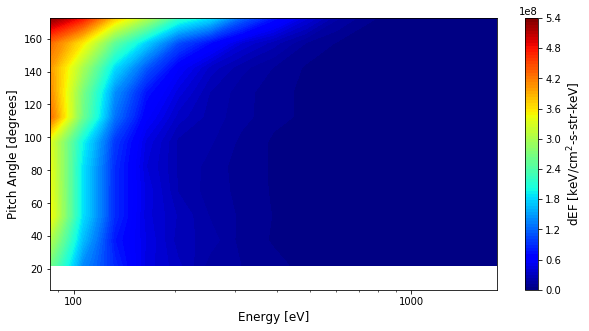

In [25]:
# CDF Pitch Angle Plotting
time = 11
for t in range(time,time+1):
    print(t)
    Y, X = np.meshgrid(pa_2_01[0],energy_2_01[0,0:15])
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    D = data_2_01[t,0:15,0:len(pa_2_01[0])]
    #surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
    surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
    cbar = fig.colorbar(surf)
    cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12)
    ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
    ax.set_xlabel('Energy [eV]',fontsize=12)
    ax.set_xscale('log')
    #ax.set_xticks([50, 100, 200, 300, 400, 500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.set_xlim(0,5)
    plt.show()

0


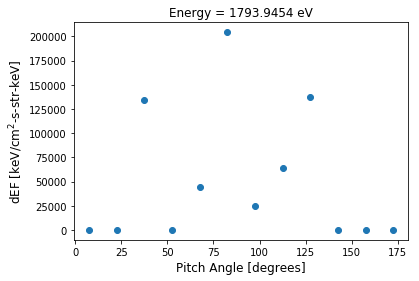

1


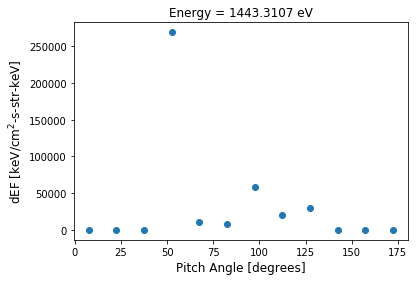

2


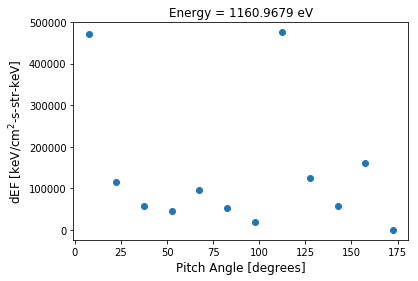

3


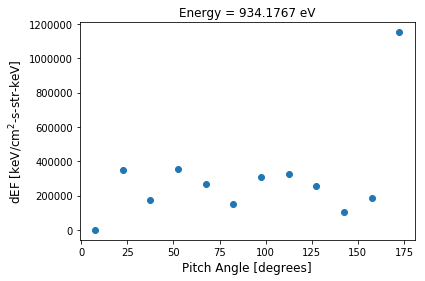

4


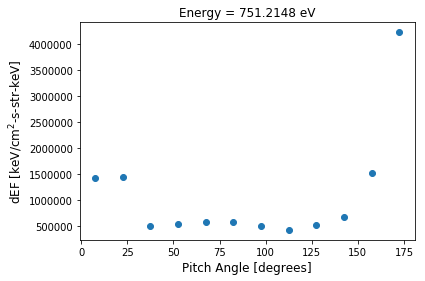

5


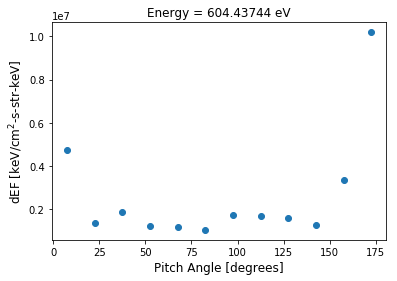

6


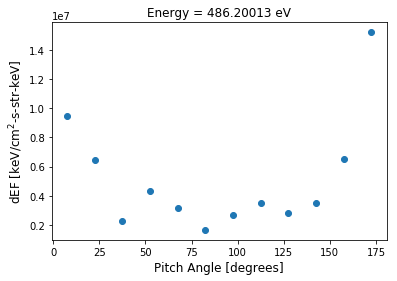

7


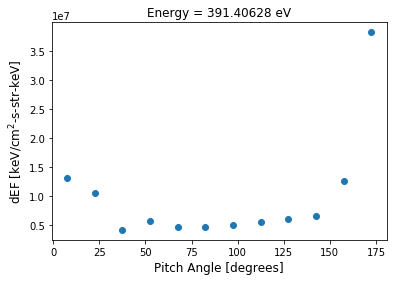

8


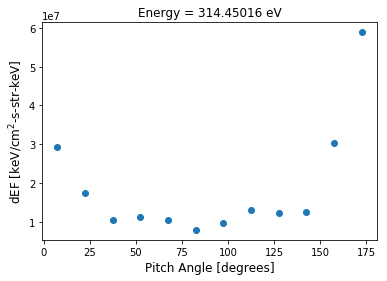

9


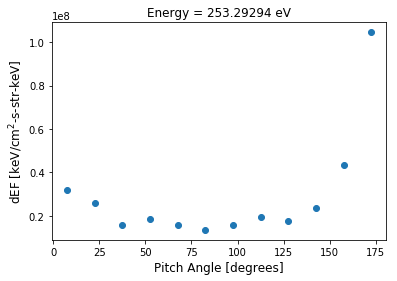

10


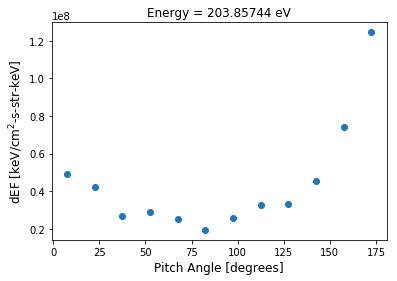

11


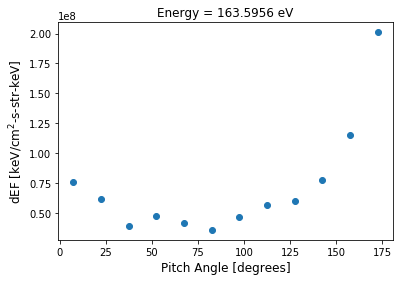

12


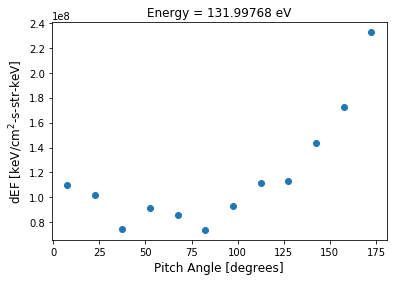

13


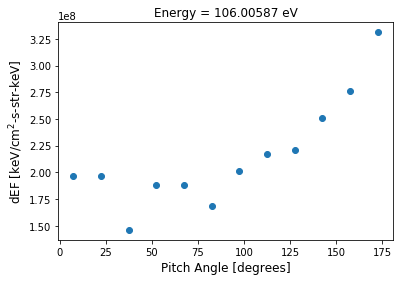

14


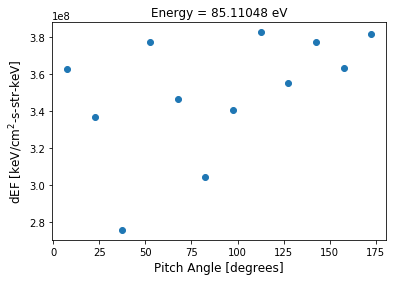

15


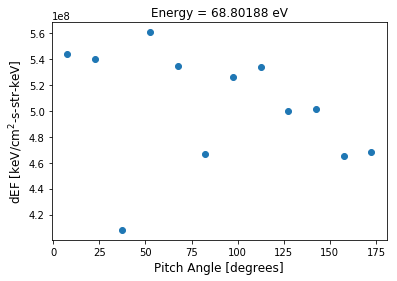

In [26]:
# Pitch angle distributions

time = 0
for e_n in range(0,16):
    y = data_2_01[time,e_n,0:12]
    print(e_n)
    plt.scatter(pa_2_01[0,0:12],y)
    plt.title("Energy = " + str(energy_2_01[time,e_n]) + " eV")
    plt.xlabel("Pitch Angle [degrees]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.show()

In [329]:
# breakpoint energies

fluxes_bp_2_01 = []
fluxes_bp_2_01_index = []
bp_start = 9
bp_end = 17

for i in range(0,len(epoch_2_01)):
    for j in range(bp_start,bp_end):
        flux = data_2_01[i,j,0:9]
        
        flux[flux == -1.] = 1.
        flux[flux == 0.] = 1.
        
        fluxes_bp_2_01.append(flux)
    
fluxes_bp_2_01 = np.array(fluxes_bp_2_01)
#fluxes_bp_2_01 = np.log10(fluxes_bp_2_01)
#fluxes_bp_2_01 = StandardScaler().fit_transform(fluxes_bp_2_01)
fluxes_bp_2_01[np.isnan(fluxes_bp_2_01)] = np.median(fluxes_bp_2_01[~np.isnan(fluxes_bp_2_01)]) #impute values in place of nan
print(np.shape(fluxes_bp_2_01))

(49432, 9)


In [330]:
k_means_bp_2_01 = cluster.KMeans(n_clusters=2)
clusters_bp_2_01 = k_means_bp_2_01.fit(fluxes_bp_2_01)
clusters_bp_2_01 = np.array(np.array_split(clusters_bp_2_01.labels_,len(clusters_bp_2_01.labels_)/(bp_end-bp_start)))

In [331]:
clusters_bp_2_01[1760] ## make sure 0 = suprathermal and 1 = core

array([0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [332]:
bp = []
times_bp = []
time_index_bp = []

for i in range(0,len(clusters_bp_2_01)):
    for j in range(1,len(clusters_bp_2_01[i])):
        if clusters_bp_2_01[i,j] > clusters_bp_2_01[i,j-1]:
            bp.append(energy_2_01[i,j+bp_start+1])
            times_bp.append(epoch_2_01[i])
            time_index_bp.append(i)

In [333]:
len(clusters_bp_2_01)

6179

In [334]:
print(np.mean(bp),np.max(bp),np.min(bp))
print(len(bp))

64.36454 85.11048 44.338993
6179


In [335]:
date_bp = pd.Timestamp.date(epoch_2_01[10])
#filename_bp = str(date_bp.year)+'0'+str(date_bp.month)+str(date_bp.day)+'_strahl_bp'
#filename_bp = str(date_bp.year)+'0'+str(date_bp.month)+str(date_bp.day)+'_halo_bp'
filename_bp = str(date_bp.year)+'0'+str(date_bp.month)+str(date_bp.day)+'_halo_par_bp'
np.savez(filename_bp,time_index_bp=time_index_bp,times_bp=times_bp,bp=bp)

In [30]:
# separating halo and strahl

fluxes_2_01 = []
fluxes_2_01_index = []
en_end = 15

for i in range(0,len(epoch_2_01)):
    for j in range(0,en_end):
        flux = data_2_01[i,j,0:12]
        
        flux[flux == -1.] = 1.
        flux[flux == 0.] = 1.
        
        fluxes_2_01.append(flux)
    
fluxes_2_01 = np.array(fluxes_2_01)
fluxes_2_01 = np.log10(fluxes_2_01)
#fluxes_2_01 = StandardScaler().fit_transform(fluxes_2_01)
fluxes_2_01[np.isnan(fluxes_2_01)] = np.median(fluxes_2_01[~np.isnan(fluxes_2_01)]) #impute values in place of nan
print(np.shape(fluxes_2_01))

(92700, 12)


In [33]:
k_means_2_01 = cluster.KMeans(n_clusters=3)
clusters_2_01 = k_means_2_01.fit(fluxes_2_01)
clusters_2_01 = np.array(np.array_split(clusters_2_01.labels_,len(clusters_2_01.labels_)/en_end))

In [34]:
clusters_2_01[0] ## make sure 1 = strong strahl and 2 = weak strahl

array([0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

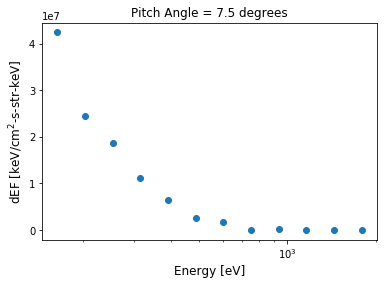

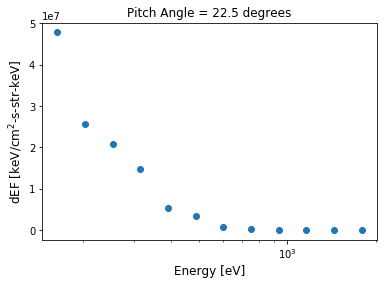

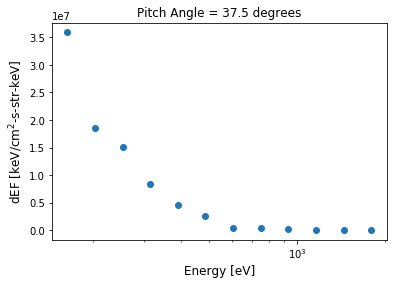

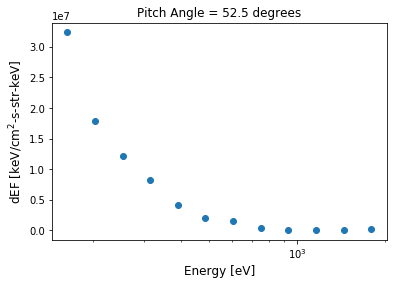

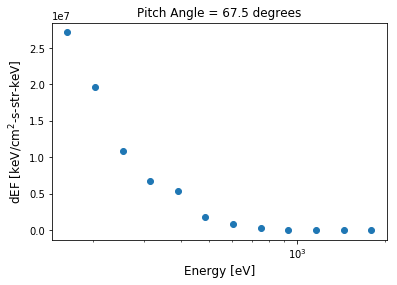

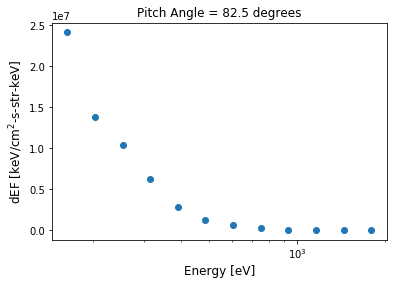

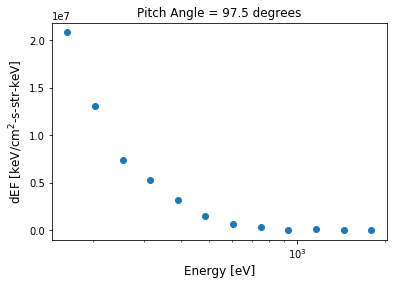

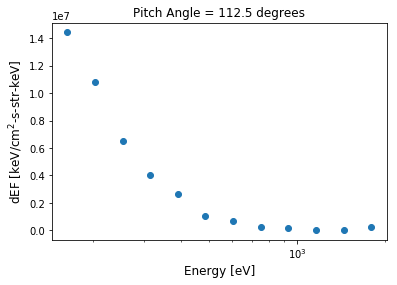

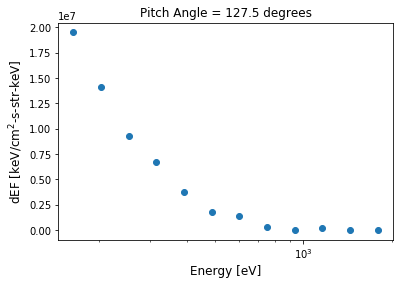

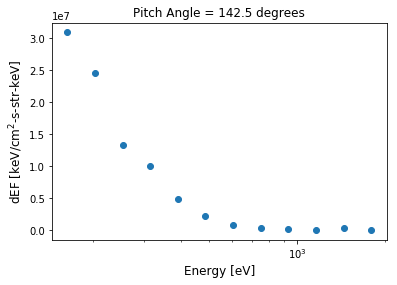

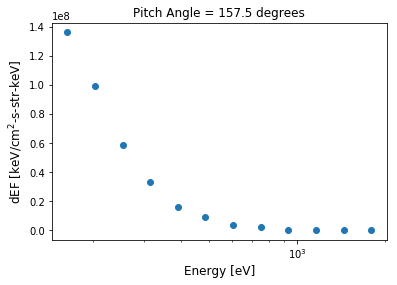

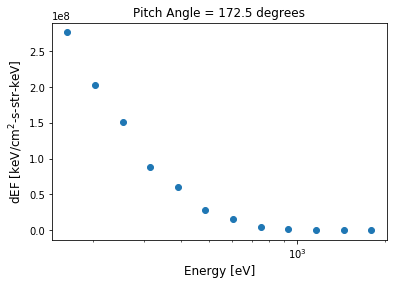

In [35]:
# Energy distributions

time = 0
for pa_n in range(0,12):
    y = (data_2_01[time,0:12,pa_n])
    plt.scatter(energy_2_01[0,0:12],y)
    plt.title("Pitch Angle = " + str(pa_2_01[time,pa_n]) + " degrees")
    plt.xscale('log')
    plt.xlabel("Energy [eV]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.show()

In [36]:
fluxes_e_2_01 = []

for i in range(0,len(epoch_2_01)):
    for j in range(0,12):
        flux = data_2_01[i,0:12,j]
        
        flux[flux == -1.] = 1.
        flux[flux == 0.] = 1.
        
        fluxes_e_2_01.append(flux)
    
fluxes_e_2_01 = np.array(fluxes_e_2_01)
#fluxes_e_2_01 = np.log10(fluxes_e_2_01)
#fluxes_e_2_01 = StandardScaler().fit_transform(fluxes_e_2_01)
fluxes_e_2_01[np.isnan(fluxes_e_2_01)] = np.median(fluxes_e_2_01[~np.isnan(fluxes_e_2_01)]) #impute values in place of nan
print(np.shape(fluxes_e_2_01))

(74160, 12)


In [37]:
k_means_e_2_01 = cluster.KMeans(n_clusters=2)
clusters_e_2_01 = k_means_e_2_01.fit(fluxes_e_2_01)
clusters_e_2_01 = np.array(np.array_split(clusters_e_2_01.labels_,len(clusters_e_2_01.labels_)/12))

In [39]:
labels_2_01 = []

for k in range(0,len(epoch_2_01)):

    for i in range(15): #energy
        for j in range(12): #pa
            if clusters_2_01[k,i] and clusters_e_2_01[k,j] == 1:
                if clusters_2_01[k,i] == 1: ## 1 = strong strahl
                    strahl = 1
                elif clusters_2_01[k,i] == 2: ## 2 = weak strahl
                    strahl = 2
            else:
                strahl = 0
            labels_2_01.append(strahl)
            
labels_2_01 = np.array(np.array_split(labels_2_01,len(epoch_2_01)))
print(np.shape(labels_2_01))

final_labels = []
for k in range(len(epoch_2_01)):
    final_labels.append(np.array(np.array_split(labels_2_01[k],15)))
    
final_labels = np.array(final_labels)
print(np.shape(final_labels))

(6180, 180)
(6180, 15, 12)


In [40]:
final_labels[100] # pa along x and energy along y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [41]:
no_strahl_times = []
no_strahl_time_index = []
strong_strahl_times = []
strong_strahl_time_index = []
weak_strahl_times = []
weak_strahl_time_index = []

strong_strahl_energies = []
strong_strahl_pa = []
strong_strahl_fwhm = []
weak_strahl_energies = []
weak_strahl_pa = []
weak_strahl_fwhm = []

data_2_01[np.isnan(data_2_01)] = np.median(data_2_01[~np.isnan(data_2_01)]) #impute values in place of nan

for i in range(len(epoch_2_01)):
    
    temp_ss_energies = []
    temp_ss_pa = []
    temp_ss_fwhm = []
    temp_ws_energies = []
    temp_ws_pa = []
    temp_ws_fwhm = []
    
    if 1 in final_labels[i]:
        
        strong_strahl_time_index.append(i)
        strong_strahl_times.append(epoch_2_01[i])
        
        for j in range(len(final_labels[i])):
            
            if 1 in final_labels[i,j]:
                temp_ss_energies.append(energy_2_01[i,j])
                
                t = np.polyfit(pa_2_01[i,0:12], data_2_01[i,j], 5)
                f = np.poly1d(t)
                pa_new = np.linspace(pa_2_01[i,0], pa_2_01[i,11], 50)
                y_new = f(pa_new)
                xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
                fwhm = np.max(xs)-np.min(xs)
                temp_ss_fwhm.append(fwhm)
                
        strong_strahl_energies.append(temp_ss_energies)
        strong_strahl_fwhm.append(temp_ss_fwhm)
            
        for k in range(12):
                
            if 1 in final_labels[i,:,k]:
                temp_ss_pa.append(pa_2_01[i,k])
        
        strong_strahl_pa.append(temp_ss_pa)
    
    if 2 in final_labels[i]:
        
        weak_strahl_time_index.append(i)
        weak_strahl_times.append(epoch_2_01[i])
        
        for j in range(len(final_labels[i])):
            
            if 2 in final_labels[i,j]:
                temp_ws_energies.append(energy_2_01[i,j])
                
                t = np.polyfit(pa_2_01[i,0:12], data_2_01[i,j], 5)
                f = np.poly1d(t)
                pa_new = np.linspace(pa_2_01[i,0], pa_2_01[i,11], 50)
                y_new = f(pa_new)
                xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
                fwhm = np.max(xs)-np.min(xs)
                temp_ws_fwhm.append(fwhm)
                
        weak_strahl_energies.append(temp_ws_energies)
        weak_strahl_fwhm.append(temp_ws_fwhm)
            
        for k in range(12):
                
            if 2 in final_labels[i,:,k]:
                temp_ws_pa.append(pa_2_01[i,k])
        
        weak_strahl_pa.append(temp_ws_pa)
    
    elif 1 not in final_labels[i]:
        no_strahl_time_index.append(i)
        no_strahl_times.append(epoch_2_01[i])


In [42]:
(weak_strahl_fwhm)[0]

[2, 3, 2, 2]

In [75]:
print(len(no_strahl_time_index))
print(len(weak_strahl_time_index))
print(len(strong_strahl_time_index))
print(len(no_strahl_time_index)+len(strong_strahl_time_index))

572
5608
5608
6180


In [520]:
date = pd.Timestamp.date(strong_strahl_times[0])
filename_a = str(date.year)+'0'+str(date.month)+str(date.day)+'_strong_strahl'
filename_b = str(date.year)+'0'+str(date.month)+str(date.day)+'_weak_strahl'
filename_c = str(date.year)+'0'+str(date.month)+str(date.day)+'_no_strahl'
np.savez(filename_a,strong_strahl_time_index=strong_strahl_time_index,strong_strahl_times=strong_strahl_times,strong_strahl_energies=strong_strahl_energies,strong_strahl_pa=strong_strahl_pa,strong_strahl_fwhm=strong_strahl_fwhm)
np.savez(filename_b,weak_strahl_time_index=weak_strahl_time_index,weak_strahl_times=weak_strahl_times,weak_strahl_energies=weak_strahl_energies,weak_strahl_pa=weak_strahl_pa,weak_strahl_fwhm=weak_strahl_fwhm)
np.savez(filename_c,no_strahl_time_index=no_strahl_time_index,no_strahl_times=no_strahl_times)


In [2]:
test = np.load('Third_Encounter/20190830_strong_strahl.npz',allow_pickle=True)
test.files

['strong_strahl_time_index',
 'strong_strahl_times',
 'strong_strahl_energies',
 'strong_strahl_pa',
 'strong_strahl_fwhm']

In [3]:
testa=test['strong_strahl_time_index']
len(testa)

5636

In [4]:
test2 = np.load('Third_Encounter/20190830_weak_strahl.npz',allow_pickle=True)
test2.files

['weak_strahl_time_index',
 'weak_strahl_times',
 'weak_strahl_energies',
 'weak_strahl_pa',
 'weak_strahl_fwhm']

In [5]:
test2a=test2['weak_strahl_time_index']
len(test2a)

5595

# Analysis

Strahl BP mean =  65.93023612043622
Strahl BP minimum =  30.675048828125
Strahl BP maximum =  131.9976806640625
Strahl BP standard deviation =  12.072012218427043
 
Perp Halo BP mean =  66.41158794357897
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  11.88290458101492


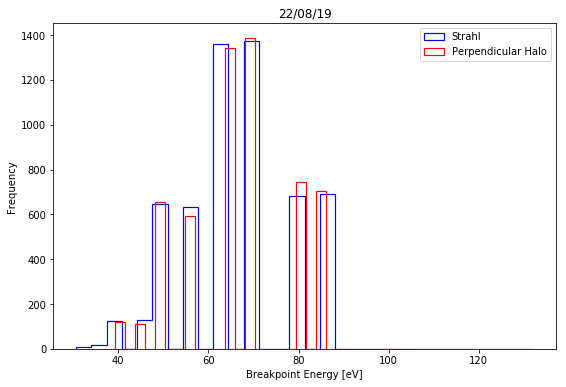

In [48]:
strahl1 = np.load('Third_Encounter/20190822_bp.npz',allow_pickle=True)
halo1 = np.load('Third_Encounter/20190822_halo_bp.npz',allow_pickle=True)
halo_par1 = np.load('Third_Encounter/20190822_halo_par_bp.npz',allow_pickle=True)
s_bp1 = strahl1['bp']
h_bp1 = halo1['bp']
hp_bp1 = halo_par1['bp']

s_fn1 = np.random.randint(-1.5,1.5,len(s_bp1)) * 5
h_fn1 = np.random.randint(-1.5,1.5,len(h_bp1)) * 5
hp_fn1 = np.random.randint(-1.5,1.5,len(hp_bp1)) * 5

sf_bp1 = s_bp1 + s_fn1
hf_bp1 = h_bp1 + h_fn1
hpf_bp1 = hp_bp1 + hp_fn1

print('Strahl BP mean = ',np.mean(sf_bp1))
print('Strahl BP minimum = ',np.min(sf_bp1))
print('Strahl BP maximum = ',np.max(sf_bp1))
print('Strahl BP standard deviation = ',np.std(sf_bp1))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp1))
print('Perp Halo BP minimum = ',np.min(hf_bp1))
print('Perp Halo BP maximum = ',np.max(hf_bp1))
print('Perp Halo BP standard deviation = ',np.std(hf_bp1))

plt.figure(figsize=(9,6))
plt.hist(sf_bp1,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp1,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('22/08/19')
plt.legend()

Strahl BP mean =  62.39108626541582
Strahl BP minimum =  39.338993072509766
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  9.343840484381106
 
Perp Halo BP mean =  62.45990611511527
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  85.11048126220703
Perp Halo BP standard deviation =  9.030909194814003


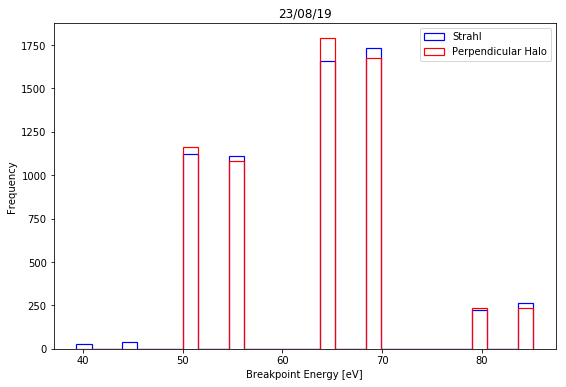

In [53]:
strahl2 = np.load('Third_Encounter/20190823_bp.npz',allow_pickle=True)
halo2 = np.load('Third_Encounter/20190823_halo_bp.npz',allow_pickle=True)
s_bp2 = strahl2['bp']
h_bp2 = halo2['bp']

s_fn2 = np.random.randint(-1.5,1.5,len(s_bp2)) * 5
h_fn2 = np.random.randint(-1.5,1.5,len(h_bp2)) * 5

sf_bp2 = s_bp2 + s_fn2
hf_bp2 = h_bp2 + h_fn2

halo_par2 = np.load('Third_Encounter/20190823_halo_par_bp.npz',allow_pickle=True)
hp_bp2 = halo_par2['bp']
hp_fn2 = np.random.randint(-1.5,1.5,len(hp_bp2)) * 5
hpf_bp2 = hp_bp2 + hp_fn2

print('Strahl BP mean = ',np.mean(sf_bp2))
print('Strahl BP minimum = ',np.min(sf_bp2))
print('Strahl BP maximum = ',np.max(sf_bp2))
print('Strahl BP standard deviation = ',np.std(sf_bp2))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp2))
print('Perp Halo BP minimum = ',np.min(hf_bp2))
print('Perp Halo BP maximum = ',np.max(hf_bp2))
print('Perp Halo BP standard deviation = ',np.std(hf_bp2))

plt.figure(figsize=(9,6))
plt.hist(sf_bp2,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp2,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('23/08/19')
plt.legend()

Strahl BP mean =  59.75447791448303
Strahl BP minimum =  39.338993072509766
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  10.412718651311456
 
Perp Halo BP mean =  62.21948240706064
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  85.11048126220703
Perp Halo BP standard deviation =  10.218932758833782


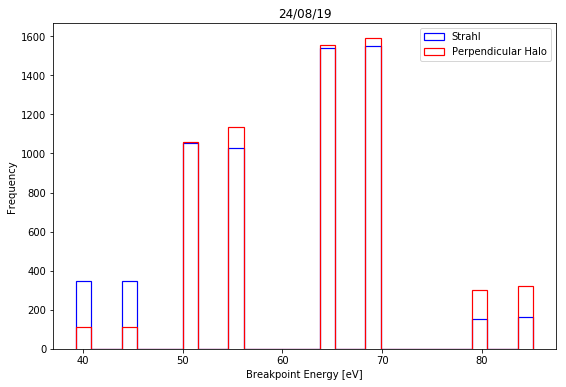

In [54]:
strahl3 = np.load('Third_Encounter/20190824_bp.npz',allow_pickle=True)
halo3 = np.load('Third_Encounter/20190824_halo_bp.npz',allow_pickle=True)
s_bp3 = strahl3['bp']
h_bp3 = halo3['bp']

s_fn3 = np.random.randint(-1.5,1.5,len(s_bp3)) * 5
h_fn3 = np.random.randint(-1.5,1.5,len(h_bp3)) * 5

sf_bp3 = s_bp3 + s_fn3
hf_bp3 = h_bp3 + h_fn3

halo_par3 = np.load('Third_Encounter/20190824_halo_par_bp.npz',allow_pickle=True)
hp_bp3 = halo_par3['bp']
hp_fn3 = np.random.randint(-1.5,1.5,len(hp_bp3)) * 5
hpf_bp3 = hp_bp3 + hp_fn3

print('Strahl BP mean = ',np.mean(sf_bp3))
print('Strahl BP minimum = ',np.min(sf_bp3))
print('Strahl BP maximum = ',np.max(sf_bp3))
print('Strahl BP standard deviation = ',np.std(sf_bp3))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp3))
print('Perp Halo BP minimum = ',np.min(hf_bp3))
print('Perp Halo BP maximum = ',np.max(hf_bp3))
print('Perp Halo BP standard deviation = ',np.std(hf_bp3))

plt.figure(figsize=(9,6))
plt.hist(sf_bp3,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp3,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('24/08/19')
plt.legend()

Strahl BP mean =  62.36709215972802
Strahl BP minimum =  39.338993072509766
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  7.053466754549485
 
Perp Halo BP mean =  63.1817061421169
Perp Halo BP minimum =  50.041507720947266
Perp Halo BP maximum =  85.11048126220703
Perp Halo BP standard deviation =  7.382221256996579


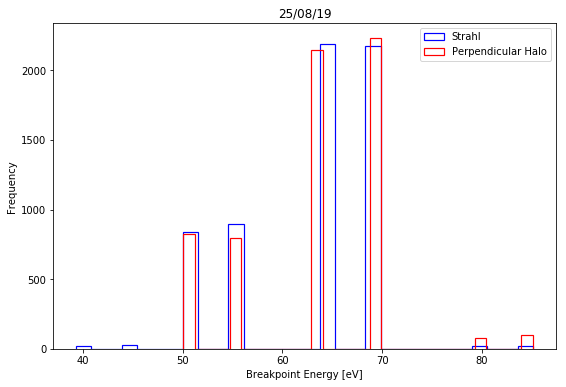

In [55]:
strahl4 = np.load('Third_Encounter/20190825_bp.npz',allow_pickle=True)
halo4 = np.load('Third_Encounter/20190825_halo_bp.npz',allow_pickle=True)
s_bp4 = strahl4['bp']
h_bp4 = halo4['bp']

s_fn4 = np.random.randint(-1.5,1.5,len(s_bp4)) * 5
h_fn4 = np.random.randint(-1.5,1.5,len(h_bp4)) * 5

sf_bp4 = s_bp4 + s_fn4
hf_bp4 = h_bp4 + h_fn4

halo_par4 = np.load('Third_Encounter/20190825_halo_par_bp.npz',allow_pickle=True)
hp_bp4 = halo_par4['bp']
hp_fn4 = np.random.randint(-1.5,1.5,len(hp_bp4)) * 5
hpf_bp4 = hp_bp4 + hp_fn4

print('Strahl BP mean = ',np.mean(sf_bp4))
print('Strahl BP minimum = ',np.min(sf_bp4))
print('Strahl BP maximum = ',np.max(sf_bp4))
print('Strahl BP standard deviation = ',np.std(sf_bp4))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp4))
print('Perp Halo BP minimum = ',np.min(hf_bp4))
print('Perp Halo BP maximum = ',np.max(hf_bp4))
print('Perp Halo BP standard deviation = ',np.std(hf_bp4))

plt.figure(figsize=(9,6))
plt.hist(sf_bp4,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp4,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('25/08/19')
plt.legend()

Strahl BP mean =  61.67378666895187
Strahl BP minimum =  39.338993072509766
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  9.954077791185078
 
Perp Halo BP mean =  64.57363944756673
Perp Halo BP minimum =  50.041507720947266
Perp Halo BP maximum =  85.11048126220703
Perp Halo BP standard deviation =  11.440282668342148


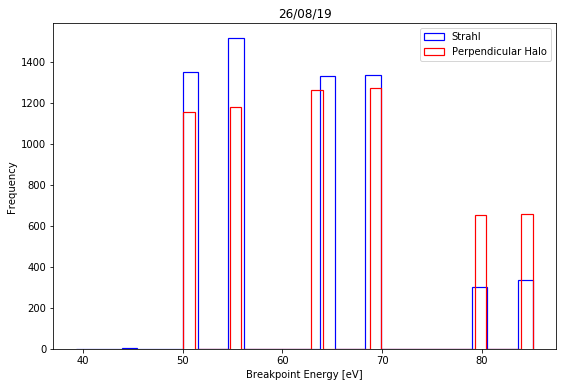

In [56]:
strahl5 = np.load('Third_Encounter/20190826_bp.npz',allow_pickle=True)
halo5 = np.load('Third_Encounter/20190826_halo_bp.npz',allow_pickle=True)
s_bp5 = strahl5['bp']
h_bp5 = halo5['bp']

s_fn5 = np.random.randint(-1.5,1.5,len(s_bp5)) * 5
h_fn5 = np.random.randint(-1.5,1.5,len(h_bp5)) * 5

sf_bp5 = s_bp5 + s_fn5
hf_bp5 = h_bp5 + h_fn5

halo_par5 = np.load('Third_Encounter/20190826_halo_par_bp.npz',allow_pickle=True)
hp_bp5 = halo_par5['bp']
hp_fn5 = np.random.randint(-1.5,1.5,len(hp_bp5)) * 5
hpf_bp5 = hp_bp5 + hp_fn5

print('Strahl BP mean = ',np.mean(sf_bp5))
print('Strahl BP minimum = ',np.min(sf_bp5))
print('Strahl BP maximum = ',np.max(sf_bp5))
print('Strahl BP standard deviation = ',np.std(sf_bp5))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp5))
print('Perp Halo BP minimum = ',np.min(hf_bp5))
print('Perp Halo BP maximum = ',np.max(hf_bp5))
print('Perp Halo BP standard deviation = ',np.std(hf_bp5))

plt.figure(figsize=(9,6))
plt.hist(sf_bp5,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp5,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('26/08/19')
plt.legend()

Strahl BP mean =  69.5273886689862
Strahl BP minimum =  50.041507720947266
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  7.059858428632369
 
Perp Halo BP mean =  72.14571962263977
Perp Halo BP minimum =  55.041507720947266
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  8.253991015671849


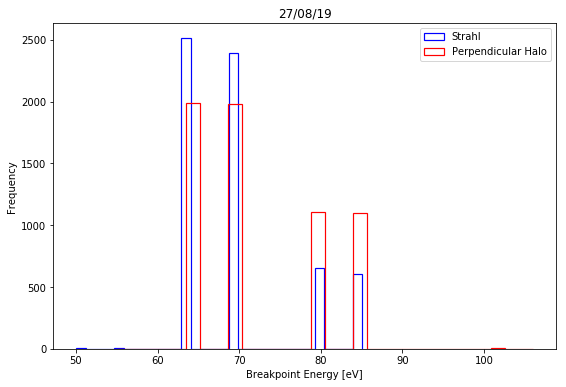

In [57]:
strahl6 = np.load('Third_Encounter/20190827_bp.npz',allow_pickle=True)
halo6 = np.load('Third_Encounter/20190827_halo_bp.npz',allow_pickle=True)
s_bp6 = strahl6['bp']
h_bp6 = halo6['bp']

s_fn6 = np.random.randint(-1.5,1.5,len(s_bp6)) * 5
h_fn6 = np.random.randint(-1.5,1.5,len(h_bp6)) * 5

sf_bp6 = s_bp6 + s_fn6
hf_bp6 = h_bp6 + h_fn6

halo_par6 = np.load('Third_Encounter/20190827_halo_par_bp.npz',allow_pickle=True)
hp_bp6 = halo_par6['bp']
hp_fn6 = np.random.randint(-1.5,1.5,len(hp_bp6)) * 5
hpf_bp6 = hp_bp6 + hp_fn6

print('Strahl BP mean = ',np.mean(sf_bp6))
print('Strahl BP minimum = ',np.min(sf_bp6))
print('Strahl BP maximum = ',np.max(sf_bp6))
print('Strahl BP standard deviation = ',np.std(sf_bp6))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp6))
print('Perp Halo BP minimum = ',np.min(hf_bp6))
print('Perp Halo BP maximum = ',np.max(hf_bp6))
print('Perp Halo BP standard deviation = ',np.std(hf_bp6))

plt.figure(figsize=(9,6))
plt.hist(sf_bp6,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp6,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('27/08/19')
plt.legend()

Strahl BP mean =  61.95931783879845
Strahl BP minimum =  30.675048828125
Strahl BP maximum =  106.00586700439453
Strahl BP standard deviation =  8.450492543228549
 
Perp Halo BP mean =  62.55593463008844
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  8.580109169505018


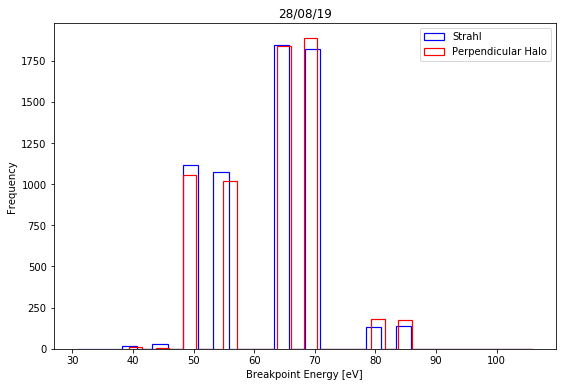

In [58]:
strahl7 = np.load('Third_Encounter/20190828_bp.npz',allow_pickle=True)
halo7 = np.load('Third_Encounter/20190828_halo_bp.npz',allow_pickle=True)
s_bp7 = strahl7['bp']
h_bp7 = halo7['bp']

s_fn7 = np.random.randint(-1.5,1.5,len(s_bp7)) * 5
h_fn7 = np.random.randint(-1.5,1.5,len(h_bp7)) * 5

sf_bp7 = s_bp7 + s_fn7
hf_bp7 = h_bp7 + h_fn7

halo_par7 = np.load('Third_Encounter/20190828_halo_par_bp.npz',allow_pickle=True)
hp_bp7 = halo_par7['bp']
hp_fn7 = np.random.randint(-1.5,1.5,len(hp_bp7)) * 5
hpf_bp7 = hp_bp7 + hp_fn7

print('Strahl BP mean = ',np.mean(sf_bp7))
print('Strahl BP minimum = ',np.min(sf_bp7))
print('Strahl BP maximum = ',np.max(sf_bp7))
print('Strahl BP standard deviation = ',np.std(sf_bp7))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp7))
print('Perp Halo BP minimum = ',np.min(hf_bp7))
print('Perp Halo BP maximum = ',np.max(hf_bp7))
print('Perp Halo BP standard deviation = ',np.std(hf_bp7))

plt.figure(figsize=(9,6))
plt.hist(sf_bp7,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp7,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('28/08/19')
plt.legend()

Strahl BP mean =  68.19843212997212
Strahl BP minimum =  30.675048828125
Strahl BP maximum =  85.11048126220703
Strahl BP standard deviation =  10.625410664197256
 
Perp Halo BP mean =  64.05394511217021
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  17.477744476836296


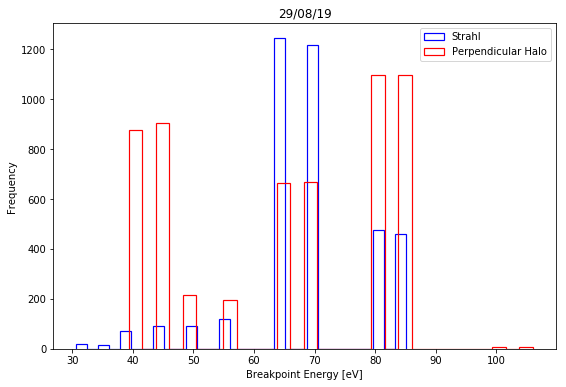

In [59]:
strahl8 = np.load('Third_Encounter/20190829_bp.npz',allow_pickle=True)
halo8 = np.load('Third_Encounter/20190829_halo_bp.npz',allow_pickle=True)
s_bp8 = strahl8['bp']
h_bp8 = halo8['bp']

s_fn8 = np.random.randint(-1.5,1.5,len(s_bp8)) * 5
h_fn8 = np.random.randint(-1.5,1.5,len(h_bp8)) * 5

sf_bp8 = s_bp8 + s_fn8
hf_bp8 = h_bp8 + h_fn8

halo_par8 = np.load('Third_Encounter/20190829_halo_par_bp.npz',allow_pickle=True)
hp_bp8 = halo_par8['bp']
hp_fn8 = np.random.randint(-1.5,1.5,len(hp_bp8)) * 5
hpf_bp8 = hp_bp8 + hp_fn8

print('Strahl BP mean = ',np.mean(sf_bp8))
print('Strahl BP minimum = ',np.min(sf_bp8))
print('Strahl BP maximum = ',np.max(sf_bp8))
print('Strahl BP standard deviation = ',np.std(sf_bp8))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp8))
print('Perp Halo BP minimum = ',np.min(hf_bp8))
print('Perp Halo BP maximum = ',np.max(hf_bp8))
print('Perp Halo BP standard deviation = ',np.std(hf_bp8))

plt.figure(figsize=(9,6))
plt.hist(sf_bp8,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp8,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('29/08/19')
plt.legend()

Strahl BP mean =  75.33456425311407
Strahl BP minimum =  39.338993072509766
Strahl BP maximum =  131.9976806640625
Strahl BP standard deviation =  15.889060408003667
 
Perp Halo BP mean =  74.36786736214265
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  14.954444043232899


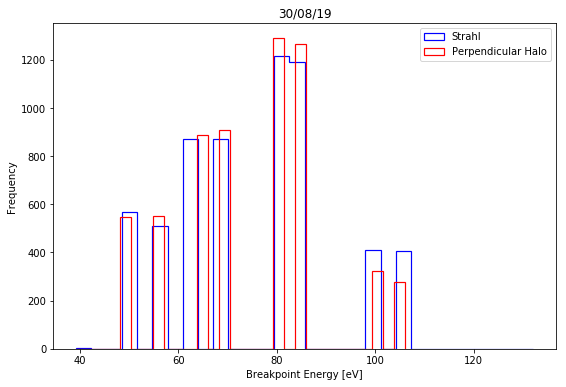

In [61]:
strahl9 = np.load('Third_Encounter/20190830_bp.npz',allow_pickle=True)
halo9 = np.load('Third_Encounter/20190830_halo_bp.npz',allow_pickle=True)
s_bp9 = strahl9['bp']
h_bp9 = halo9['bp']

s_fn9 = np.random.randint(-1.5,1.5,len(s_bp9)) * 5
h_fn9 = np.random.randint(-1.5,1.5,len(h_bp9)) * 5

sf_bp9 = s_bp9 + s_fn9
hf_bp9 = h_bp9 + h_fn9

halo_par9 = np.load('Third_Encounter/20190830_halo_par_bp.npz',allow_pickle=True)
hp_bp9 = halo_par9['bp']
hp_fn9 = np.random.randint(-1.5,1.5,len(hp_bp9)) * 5
hpf_bp9 = hp_bp9 + hp_fn9

print('Strahl BP mean = ',np.mean(sf_bp9))
print('Strahl BP minimum = ',np.min(sf_bp9))
print('Strahl BP maximum = ',np.max(sf_bp9))
print('Strahl BP standard deviation = ',np.std(sf_bp9))
print(' ')
print('Perp Halo BP mean = ',np.mean(hf_bp9))
print('Perp Halo BP minimum = ',np.min(hf_bp9))
print('Perp Halo BP maximum = ',np.max(hf_bp9))
print('Perp Halo BP standard deviation = ',np.std(hf_bp9))

plt.figure(figsize=(9,6))
plt.hist(sf_bp9,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(hf_bp9,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('30/08/19')
plt.legend()

In [62]:
all_hpf_bp = np.concatenate((hpf_bp1,hpf_bp2,hpf_bp3,hpf_bp4,hpf_bp5,hpf_bp6,hpf_bp7,hpf_bp8,hpf_bp9))

all_sf_bp = np.concatenate((sf_bp1,sf_bp2,sf_bp3,sf_bp4,sf_bp5,sf_bp6,sf_bp7,sf_bp8,sf_bp9))
all_hf_bp = np.concatenate((hf_bp1,hf_bp2,hf_bp3,hf_bp4,hf_bp5,hf_bp6,hf_bp7,hf_bp8,hf_bp9))

Strahl BP mean =  65.07232823165198
Strahl BP minimum =  30.675048828125
Strahl BP maximum =  131.9976806640625
Strahl BP standard deviation =  11.418707263815993
 
Perp Halo BP mean =  65.76197835755588
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  12.152907161983096
 
Par Halo BP mean =  67.40246636093354
Par Halo BP minimum =  39.338993072509766
Par Halo BP maximum =  106.00586700439453
Par Halo BP standard deviation =  12.02346458621663


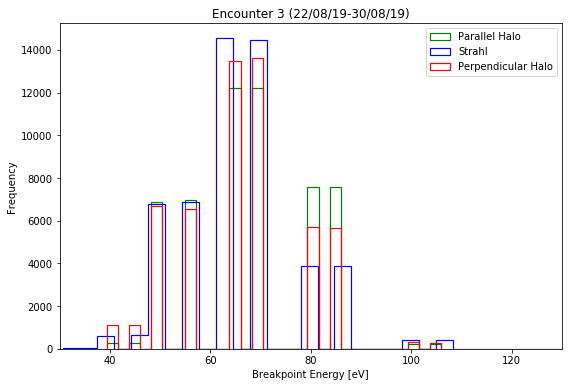

In [63]:
plt.figure(figsize=(9,6))
plt.hist(all_hpf_bp,30,color='g',histtype='step',label='Parallel Halo',linewidth=1.2)
plt.hist(all_sf_bp,30,color='b',histtype='step',label='Strahl',linewidth=1.2)
plt.hist(all_hf_bp,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('Encounter 3 (22/08/19-30/08/19)')
plt.xlim(30,130)
plt.legend()

print('Strahl BP mean = ',np.mean(all_sf_bp))
print('Strahl BP minimum = ',np.min(all_sf_bp))
print('Strahl BP maximum = ',np.max(all_sf_bp))
print('Strahl BP standard deviation = ',np.std(all_sf_bp))
print(' ')
print('Perp Halo BP mean = ',np.mean(all_hf_bp))
print('Perp Halo BP minimum = ',np.min(all_hf_bp))
print('Perp Halo BP maximum = ',np.max(all_hf_bp))
print('Perp Halo BP standard deviation = ',np.std(all_hf_bp))
print(' ')
print('Par Halo BP mean = ',np.mean(all_hpf_bp))
print('Par Halo BP minimum = ',np.min(all_hpf_bp))
print('Par Halo BP maximum = ',np.max(all_hpf_bp))
print('Par Halo BP standard deviation = ',np.std(all_hpf_bp))

Perp Halo BP mean =  65.75225786749645
Perp Halo BP minimum =  39.338993072509766
Perp Halo BP maximum =  106.00586700439453
Perp Halo BP standard deviation =  12.156739489807794
 
Par Halo BP mean =  67.38703199374261
Par Halo BP minimum =  39.338993072509766
Par Halo BP maximum =  106.00586700439453
Par Halo BP standard deviation =  12.029359924837847


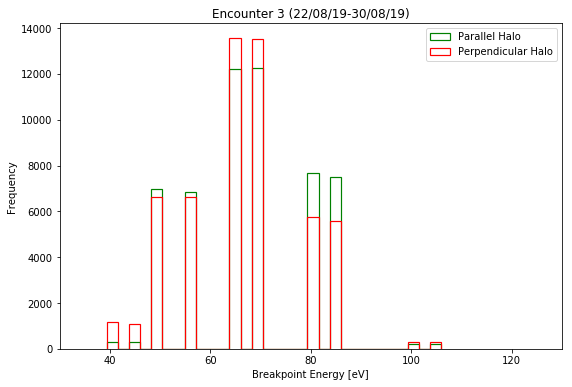

In [37]:
plt.figure(figsize=(9,6))
plt.hist(all_hpf_bp,30,color='g',histtype='step',label='Parallel Halo',linewidth=1.2)
plt.hist(all_hf_bp,30,color='r',histtype='step',label='Perpendicular Halo',linewidth=1.2)
plt.xlabel('Breakpoint Energy [eV]')
plt.ylabel('Frequency')
plt.title('Encounter 3 (22/08/19-30/08/19)')
plt.xlim(30,130)
plt.legend()

print('Perp Halo BP mean = ',np.mean(all_hf_bp))
print('Perp Halo BP minimum = ',np.min(all_hf_bp))
print('Perp Halo BP maximum = ',np.max(all_hf_bp))
print('Perp Halo BP standard deviation = ',np.std(all_hf_bp))
print(' ')
print('Par Halo BP mean = ',np.mean(all_hpf_bp))
print('Par Halo BP minimum = ',np.min(all_hpf_bp))
print('Par Halo BP maximum = ',np.max(all_hpf_bp))
print('Par Halo BP standard deviation = ',np.std(all_hpf_bp))